# Exploratory Data Analysis: Coffee Machine Sales Dataset


This notebook performs an exploratory data analysis (EDA) on the coffee sales dataset. 
The analysis includes data cleaning, summary statistics, and visualizations to identify patterns and insights.

### Objectives
1. Understand the structure and quality of the data.
2. Analyze transaction patterns by date, payment method, and coffee types.
3. Visualize trends in sales and customer preferences.


In [7]:

# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Set visualization styles
sns.set_theme(style="darkgrid")
plt.style.use("dark_background")

# Get the current working directory (CWD)
current_dir = os.getcwd()

# Define the relative path to the CSV file
relative_file_path = "coffee_sales_index.csv" 

# Construct the full path using the CWD and relative path
file_path = os.path.join(current_dir, relative_file_path)

# Load dataset
data = pd.read_csv(file_path)

# Display first few rows
data.head()


,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte



## Data Overview

This section provides a summary of the dataset to understand its structure and identify any potential issues.


In [2]:

# Display dataset information
data.info()

# Check for missing values
data.isnull().sum()

# Display basic statistics for numerical columns
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2341 entries, 0 to 2340
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         2341 non-null   object 
 1   datetime     2341 non-null   object 
 2   cash_type    2341 non-null   object 
 3   card         2252 non-null   object 
 4   money        2341 non-null   float64
 5   coffee_name  2341 non-null   object 
dtypes: float64(1), object(5)
memory usage: 109.9+ KB


,money
count,2341.000000
mean,31.816736
std,5.094530
min,18.120000
25%,27.920000
50%,32.820000
75%,35.760000
max,40.000000



## Data Cleaning

1. Convert `datetime` to a proper datetime format for time-based analysis.
2. Handle missing values in the `card` column.
3. Check for duplicates.


In [3]:

# Convert datetime column
data['datetime'] = pd.to_datetime(data['datetime'])

# Handle missing card values - replace with 'unknown'
data['card'] = data['card'].fillna('unknown')

# Check for duplicates and remove if any
data = data.drop_duplicates()

# Confirm changes
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2341 entries, 0 to 2340
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         2341 non-null   object        
 1   datetime     2341 non-null   datetime64[ns]
 2   cash_type    2341 non-null   object        
 3   card         2341 non-null   object        
 4   money        2341 non-null   float64       
 5   coffee_name  2341 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 109.9+ KB



## Exploratory Analysis

This section dives into transaction trends, coffee preferences, and payment methods using visualizations.



### Transactions Over Time

Visualize daily transaction counts and revenue trends.


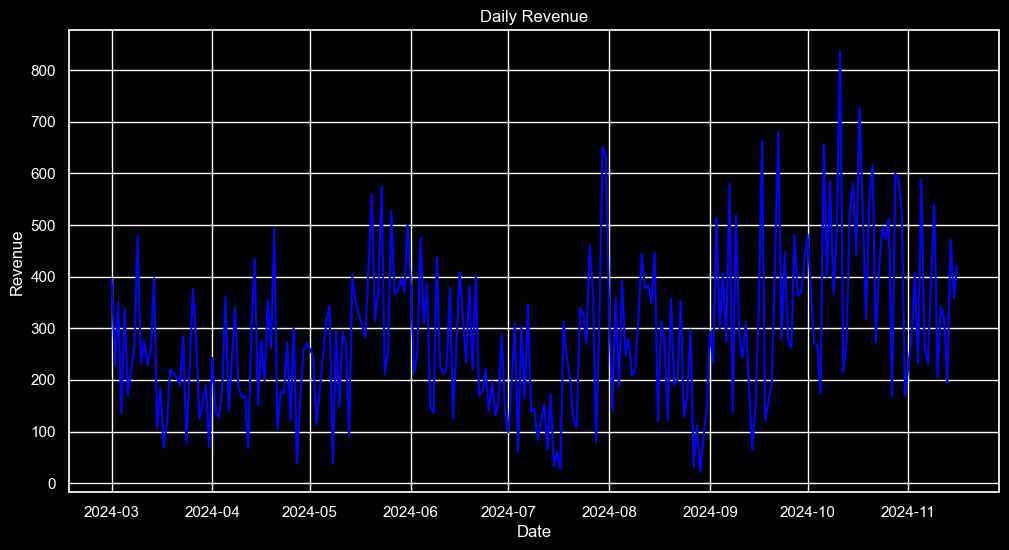

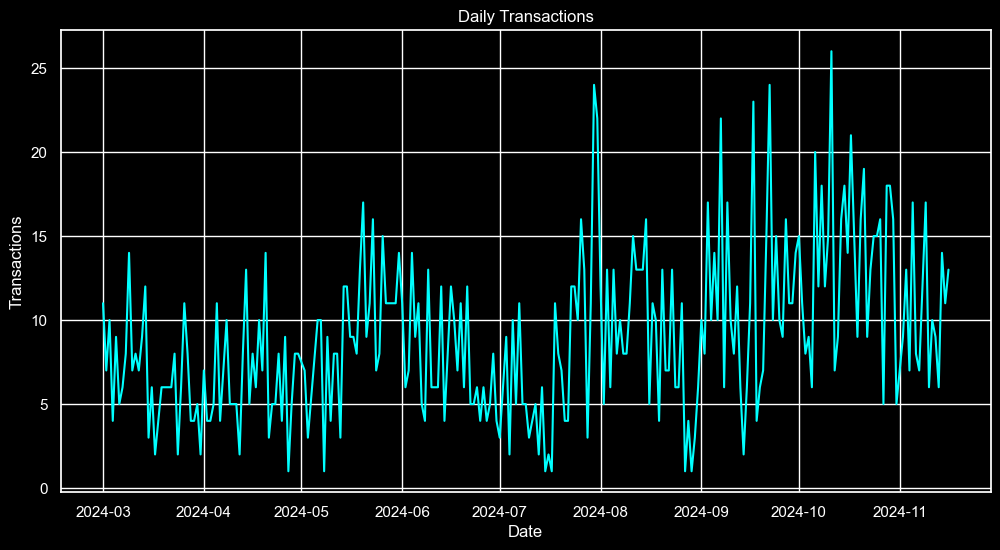

In [4]:

# Extract date and aggregate by day
data['date'] = pd.to_datetime(data['date'])
daily_data = data.groupby('date').agg({'money': 'sum', 'coffee_name': 'count'}).rename(columns={'money': 'revenue', 'coffee_name': 'transactions'})

# Plot daily revenue
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_data, x=daily_data.index, y='revenue', color='blue')
plt.title('Daily Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.show()

# Plot daily transactions
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_data, x=daily_data.index, y='transactions', color='cyan')
plt.title('Daily Transactions')
plt.xlabel('Date')
plt.ylabel('Transactions')
plt.show()



### Coffee Preferences

Identify the most popular coffee types by sales.


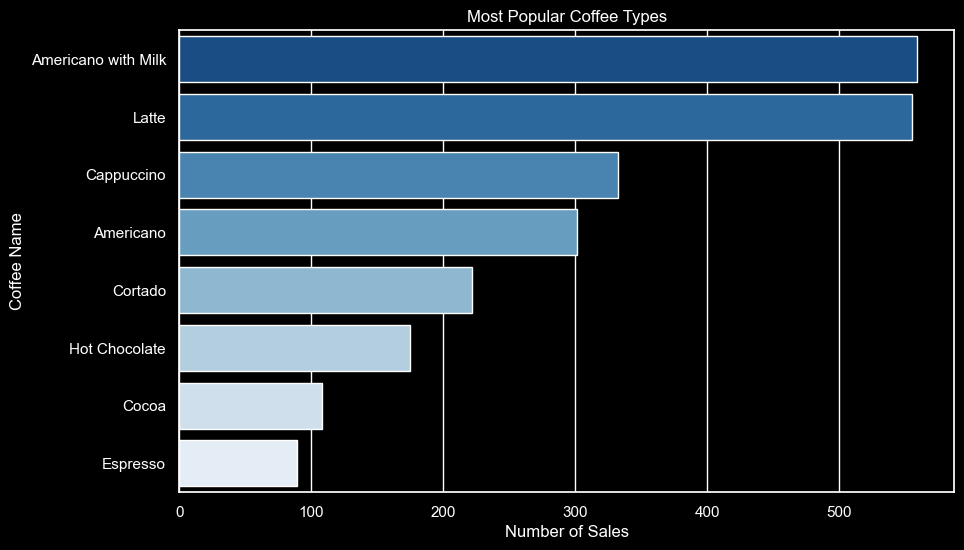

In [5]:

# Coffee type distribution
coffee_counts = data['coffee_name'].value_counts()

# Plot coffee type popularity
plt.figure(figsize=(10, 6))
sns.barplot(x=coffee_counts.values, y=coffee_counts.index, hue=coffee_counts.index, legend=False, palette="Blues_r")
plt.title('Most Popular Coffee Types')
plt.xlabel('Number of Sales')
plt.ylabel('Coffee Name')
plt.show()



### Payment Methods

Analyze the distribution of payment methods.


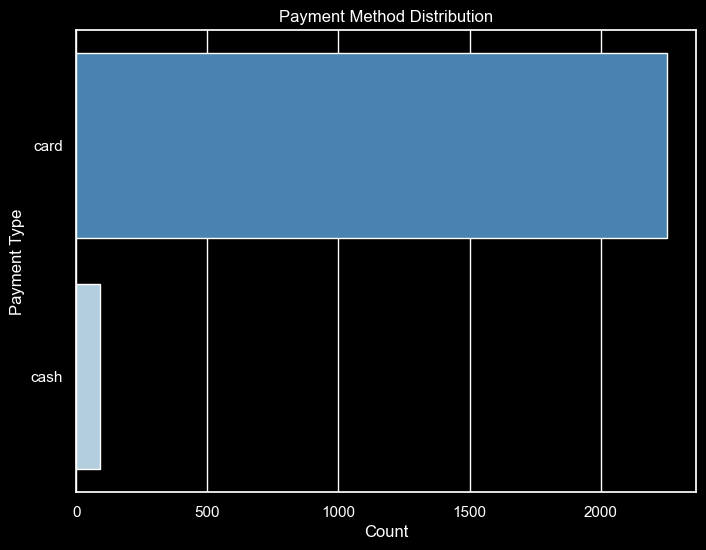

In [6]:

# Payment method distribution
payment_counts = data['cash_type'].value_counts()

# Plot payment method distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=payment_counts.values, y=payment_counts.index, hue=payment_counts.index, palette="Blues_r", legend=False)
plt.title('Payment Method Distribution')
plt.xlabel('Count')
plt.ylabel('Payment Type')
plt.show()
